## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 100)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 2. Load the Data

In [2]:
# Load transaction data
transactions = pd.read_excel('QVI_transaction_data.xlsx')
print(f"✓ Loaded transactions: {transactions.shape[0]} rows, {transactions.shape[1]} columns")

# Load customer behavior data
customer_behavior = pd.read_csv('QVI_purchase_behaviour.csv')
print(f"✓ Loaded customer behavior: {customer_behavior.shape[0]} rows, {customer_behavior.shape[1]} columns")

✓ Loaded transactions: 264836 rows, 8 columns
✓ Loaded customer behavior: 72637 rows, 3 columns


## 3. Initial Data Exploration

In [3]:
# Display first few rows of transaction data
print("Transaction Data - First 5 rows:")
display(transactions.head())

Transaction Data - First 5 rows:


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
# Display data information
print("Transaction Data - Info:")
transactions.info()

Transaction Data - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [5]:
# Display summary statistics
print("Transaction Data - Summary Statistics:")
display(transactions.describe())

Transaction Data - Summary Statistics:


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [6]:
# Display customer behavior data
print("Customer Behavior Data - First 5 rows:")
display(customer_behavior.head())

print("\nCustomer Behavior Data - Info:")
customer_behavior.info()

Customer Behavior Data - First 5 rows:


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream



Customer Behavior Data - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


## 4. Data Quality Checks

In [7]:
# Check for missing values
print("Missing values in transactions:")
print(transactions.isnull().sum())

print("\nMissing values in customer behavior:")
print(customer_behavior.isnull().sum())

Missing values in transactions:
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Missing values in customer behavior:
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [8]:
# Check for duplicates
print(f"Duplicate rows in transactions: {transactions.duplicated().sum()}")
print(f"Duplicate rows in customer behavior: {customer_behavior.duplicated().sum()}")

Duplicate rows in transactions: 1
Duplicate rows in customer behavior: 0


## 5. Data Cleaning and Preparation

In [9]:
# Convert DATE to datetime
if 'DATE' in transactions.columns:
    transactions['DATE'] = pd.to_datetime(transactions['DATE'], origin='1899-12-30', unit='D')
    print(f"✓ Converted DATE column to datetime format")
    print(f"  Date range: {transactions['DATE'].min()} to {transactions['DATE'].max()}")

✓ Converted DATE column to datetime format
  Date range: 2018-07-01 00:00:00 to 2019-06-30 00:00:00


In [10]:
# Check for outliers in PROD_QTY
print("Checking for outliers in PROD_QTY:")
print(f"  Min: {transactions['PROD_QTY'].min()}")
print(f"  Max: {transactions['PROD_QTY'].max()}")
print(f"  Mean: {transactions['PROD_QTY'].mean():.2f}")
print(f"  Median: {transactions['PROD_QTY'].median():.2f}")

# Investigate high quantity purchases
high_qty = transactions[transactions['PROD_QTY'] > 10]
print(f"\n  Transactions with PROD_QTY > 10: {len(high_qty)}")
if len(high_qty) > 0:
    print("\n  High quantity transactions:")
    display(high_qty[['LYLTY_CARD_NBR', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES']].head(10))

Checking for outliers in PROD_QTY:
  Min: 1
  Max: 200
  Mean: 1.91
  Median: 2.00

  Transactions with PROD_QTY > 10: 2

  High quantity transactions:


,LYLTY_CARD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,226000,Dorito Corn Chp Supreme 380g,200,650.0
69763,226000,Dorito Corn Chp Supreme 380g,200,650.0


In [11]:
# Check for outliers in TOT_SALES
print("Checking for outliers in TOT_SALES:")
print(f"  Min: ${transactions['TOT_SALES'].min():.2f}")
print(f"  Max: ${transactions['TOT_SALES'].max():.2f}")
print(f"  Mean: ${transactions['TOT_SALES'].mean():.2f}")
print(f"  Median: ${transactions['TOT_SALES'].median():.2f}")

# Remove extreme outliers (if any)
extreme_outliers = transactions[transactions['PROD_QTY'] > 200]
if len(extreme_outliers) > 0:
    print(f"\n⚠ Found {len(extreme_outliers)} extreme outliers (PROD_QTY > 200)")
    display(extreme_outliers[['LYLTY_CARD_NBR', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES']])
    transactions = transactions[transactions['PROD_QTY'] <= 200]
    print(f"✓ Removed extreme outliers. New shape: {transactions.shape}")
else:
    print("✓ No extreme outliers found")

Checking for outliers in TOT_SALES:
  Min: $1.50
  Max: $650.00
  Mean: $7.30
  Median: $7.40
✓ No extreme outliers found


## 6. Derive Additional Features

In [12]:
# Extract pack size from product name
def extract_pack_size(prod_name):
    """Extract pack size in grams from product name"""
    if pd.isna(prod_name):
        return np.nan
    
    # Look for patterns like "175g", "150G", etc.
    import re
    match = re.search(r'(\d+)g', prod_name.lower())
    if match:
        return int(match.group(1))
    return np.nan

transactions['PACK_SIZE'] = transactions['PROD_NAME'].apply(extract_pack_size)
print(f"✓ Extracted pack size from product names")
print(f"  Unique pack sizes: {sorted(transactions['PACK_SIZE'].dropna().unique())}")
print(f"  Missing pack sizes: {transactions['PACK_SIZE'].isnull().sum()}")

✓ Extracted pack size from product names
  Unique pack sizes: [np.int64(70), np.int64(90), np.int64(110), np.int64(125), np.int64(134), np.int64(135), np.int64(150), np.int64(160), np.int64(165), np.int64(170), np.int64(175), np.int64(180), np.int64(190), np.int64(200), np.int64(210), np.int64(220), np.int64(250), np.int64(270), np.int64(300), np.int64(330), np.int64(380)]
  Missing pack sizes: 0


In [13]:
# Extract brand name from product name
def extract_brand(prod_name):
    """Extract brand name from product name"""
    if pd.isna(prod_name):
        return np.nan
    
    # Remove size information first
    import re
    clean_name = re.sub(r'\d+g', '', prod_name, flags=re.IGNORECASE)
    # Take the first word(s) as brand
    words = clean_name.strip().split()
    if len(words) > 0:
        # Return first 1-2 words as brand
        return ' '.join(words[:2]) if len(words) > 1 else words[0]
    return np.nan

transactions['BRAND'] = transactions['PROD_NAME'].apply(extract_brand)
print(f"✓ Extracted brand from product names")
print(f"  Unique brands: {transactions['BRAND'].nunique()}")
print(f"\nTop 10 brands by transaction count:")
print(transactions['BRAND'].value_counts().head(10))

✓ Extracted brand from product names
  Unique brands: 74

Top 10 brands by transaction count:
BRAND
Smiths Crinkle       18120
Doritos Corn         15874
Thins Chips          10846
Cobs Popd             9693
Kettle Tortilla       9580
Kettle Sensations     9429
Old El                9324
Tyrrells Crisps       6442
Twisties Cheese       6284
Grain Waves           6272
Name: count, dtype: int64


In [14]:
# Calculate price per unit
transactions['PRICE_PER_UNIT'] = transactions['TOT_SALES'] / transactions['PROD_QTY']
print(f"✓ Calculated price per unit")

✓ Calculated price per unit


## 7. Merge Datasets

In [15]:
# Merge transaction data with customer behavior data
df = transactions.merge(customer_behavior, on='LYLTY_CARD_NBR', how='left')
print(f"✓ Merged datasets on LYLTY_CARD_NBR")
print(f"  Final dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")

# Check merge quality
print(f"\n  Records with missing LIFESTAGE: {df['LIFESTAGE'].isnull().sum()}")
print(f"  Records with missing PREMIUM_CUSTOMER: {df['PREMIUM_CUSTOMER'].isnull().sum()}")

# Display sample of merged data
display(df.head())

✓ Merged datasets on LYLTY_CARD_NBR
  Final dataset shape: 264836 rows, 13 columns

  Records with missing LIFESTAGE: 0
  Records with missing PREMIUM_CUSTOMER: 0


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,PRICE_PER_UNIT,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural Chip,3.00,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs Nacho,2.10,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths Crinkle,1.45,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths Chip,3.00,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle Tortilla,4.60,MIDAGE SINGLES/COUPLES,Budget


## 8. Customer Segment Analysis

### 8.1 Key Metrics by Customer Segment

In [16]:
# Group by LIFESTAGE and PREMIUM_CUSTOMER
segment_analysis = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({
    'LYLTY_CARD_NBR': 'nunique',  # Number of unique customers
    'TXN_ID': 'count',             # Total transactions
    'PROD_QTY': 'sum',             # Total quantity purchased
    'TOT_SALES': 'sum',            # Total sales revenue
    'PRICE_PER_UNIT': 'mean'       # Average price per unit
}).round(2)

segment_analysis.columns = ['Customers', 'Transactions', 'Total_Qty', 'Total_Sales', 'Avg_Price_Per_Unit']

# Calculate additional metrics
segment_analysis['Avg_Transactions_Per_Customer'] = (
    segment_analysis['Transactions'] / segment_analysis['Customers']
).round(2)

segment_analysis['Avg_Qty_Per_Transaction'] = (
    segment_analysis['Total_Qty'] / segment_analysis['Transactions']
).round(2)

segment_analysis['Avg_Sales_Per_Transaction'] = (
    segment_analysis['Total_Sales'] / segment_analysis['Transactions']
).round(2)

segment_analysis['Avg_Sales_Per_Customer'] = (
    segment_analysis['Total_Sales'] / segment_analysis['Customers']
).round(2)

print("Customer Segment Metrics:")
display(segment_analysis.sort_values('Total_Sales', ascending=False))

Customer Segment Metrics:


Customers  Transactions  Total_Qty  \
LIFESTAGE              PREMIUM_CUSTOMER                                       
OLDER FAMILIES         Budget                 4675         23160      45065   
YOUNG SINGLES/COUPLES  Mainstream             8088         20854      38632   
RETIREES               Mainstream             6479         21466      40518   
YOUNG FAMILIES         Budget                 4017         19122      37111   
OLDER SINGLES/COUPLES  Budget                 4929         18407      35220   
                       Mainstream             4930         18318      34997   
                       Premium                4750         17754      33986   
RETIREES               Budget                 4454         15201      28764   
OLDER FAMILIES         Mainstream             2831         14244      27756   
RETIREES               Premium                3872         13096      24884   
YOUNG FAMILIES         Mainstream             2728         12907      25044   
MIDAGE SINGLES/COUPLES Mainstream             3340         11874      22699   
YOUNG FAMILIES         Premium                2433         11563      22406   
OLDER FAMILIES         Premium                2274         11192      22171   
YOUNG SINGLES/COUPLES  Budget                 3779          9242      16671   
MIDAGE SINGLES/COUPLES Premium                2431          8216      15526   
YOUNG SINGLES/COUPLES  Premium                2574          6281      11331   
MIDAGE SINGLES/COUPLES Budget                 1504          5020       9496   
NEW FAMILIES           Budget                 1112          3005       5571   
                       Mainstream              849          2325       4319   
                       Premium                 588          1589       2957   

                                         Total_Sales  Avg_Price_Per_Unit  \
LIFESTAGE              PREMIUM_CUSTOMER                                    
OLDER FAMILIES         Budget              168363.25                3.73   
YOUNG SINGLES/COUPLES  Mainstream          157621.60                4.07   
RETIREES               Mainstream          155677.05                3.83   
YOUNG FAMILIES         Budget              139345.85                3.75   
OLDER SINGLES/COUPLES  Budget              136769.80                3.88   
                       Mainstream          133393.80                3.80   
                       Premium             132263.15                3.89   
RETIREES               Budget              113147.80                3.92   
OLDER FAMILIES         Mainstream          103445.55                3.73   
RETIREES               Premium              97646.05                3.92   
YOUNG FAMILIES         Mainstream           92788.75                3.71   
MIDAGE SINGLES/COUPLES Mainstream           90803.85                4.00   
YOUNG FAMILIES         Premium              84025.50                3.75   
OLDER FAMILIES         Premium              81958.40                3.70   
YOUNG SINGLES/COUPLES  Budget               61141.60                3.64   
MIDAGE SINGLES/COUPLES Premium              58432.65                3.75   
YOUNG SINGLES/COUPLES  Premium              41642.10                3.65   
MIDAGE SINGLES/COUPLES Budget               35514.80                3.73   
NEW FAMILIES           Budget               21928.45                3.92   
                       Mainstream           17013.90                3.92   
                       Premium              11491.10                3.87   

                                         Avg_Transactions_Per_Customer  \
LIFESTAGE              PREMIUM_CUSTOMER                                  
OLDER FAMILIES         Budget                                     4.95   
YOUNG SINGLES/COUPLES  Mainstream                                 2.58   
RETIREES               Mainstream                                 3.31   
YOUNG FAMILIES         Budget                                     4.76   
OLDER SINGLES/COUPLES  Budget 

### 8.2 Analysis by Lifestage

In [17]:
lifestage_analysis = df.groupby('LIFESTAGE').agg({
    'LYLTY_CARD_NBR': 'nunique',
    'TXN_ID': 'count',
    'TOT_SALES': 'sum',
    'PROD_QTY': 'sum'
}).round(2)

lifestage_analysis.columns = ['Customers', 'Transactions', 'Total_Sales', 'Total_Qty']
lifestage_analysis['Avg_Sales_Per_Customer'] = (
    lifestage_analysis['Total_Sales'] / lifestage_analysis['Customers']
).round(2)

print("Lifestage Analysis:")
display(lifestage_analysis.sort_values('Total_Sales', ascending=False))

Lifestage Analysis:


,Customers,Transactions,Total_Sales,Total_Qty,Avg_Sales_Per_Customer
LIFESTAGE,,,,,
OLDER SINGLES/COUPLES,14609,54479,402426.75,104203,27.55
RETIREES,14805,49763,366470.90,94166,24.75
OLDER FAMILIES,9780,48596,353767.20,94992,36.17
YOUNG FAMILIES,9178,43592,316160.10,84561,34.45
YOUNG SINGLES/COUPLES,14441,36377,260405.30,66634,18.03
MIDAGE SINGLES/COUPLES,7275,25110,184751.30,47721,25.40
NEW FAMILIES,2549,6919,50433.45,12847,19.79


### 8.3 Analysis by Premium Customer Status

In [18]:
premium_analysis = df.groupby('PREMIUM_CUSTOMER').agg({
    'LYLTY_CARD_NBR': 'nunique',
    'TXN_ID': 'count',
    'TOT_SALES': 'sum',
    'PROD_QTY': 'sum'
}).round(2)

premium_analysis.columns = ['Customers', 'Transactions', 'Total_Sales', 'Total_Qty']
premium_analysis['Avg_Sales_Per_Customer'] = (
    premium_analysis['Total_Sales'] / premium_analysis['Customers']
).round(2)

print("Premium Customer Analysis:")
display(premium_analysis.sort_values('Total_Sales', ascending=False))

Premium Customer Analysis:


,Customers,Transactions,Total_Sales,Total_Qty,Avg_Sales_Per_Customer
PREMIUM_CUSTOMER,,,,,
Mainstream,29245,101988,750744.50,193965,25.67
Budget,24470,93157,676211.55,177898,27.63
Premium,18922,69691,507458.95,133261,26.82


### 8.4 Brand Preference by Customer Segment

In [19]:
# Top brands by lifestage
print("Top 3 Brands by Lifestage (by Total Sales):")
for lifestage in df['LIFESTAGE'].dropna().unique():
    lifestage_df = df[df['LIFESTAGE'] == lifestage]
    top_brands = lifestage_df.groupby('BRAND')['TOT_SALES'].sum().sort_values(ascending=False).head(3)
    print(f"\n{lifestage}:")
    for brand, sales in top_brands.items():
        print(f"  {brand}: ${sales:,.2f}")

Top 3 Brands by Lifestage (by Total Sales):

YOUNG SINGLES/COUPLES:
  Doritos Corn: $17,946.90
  Smiths Crinkle: $16,718.90
  Old El: $12,444.00

MIDAGE SINGLES/COUPLES:
  Doritos Corn: $12,583.90
  Smiths Crinkle: $12,091.20
  Old El: $8,863.80

NEW FAMILIES:
  Doritos Corn: $3,546.00
  Smiths Crinkle: $2,975.50
  Old El: $2,371.50

OLDER FAMILIES:
  Smiths Crinkle: $26,286.60
  Doritos Corn: $21,517.70
  Old El: $15,804.90

OLDER SINGLES/COUPLES:
  Doritos Corn: $27,130.70
  Smiths Crinkle: $26,712.80
  Old El: $18,992.40

RETIREES:
  Doritos Corn: $24,817.60
  Smiths Crinkle: $23,518.50
  Old El: $17,829.60

YOUNG FAMILIES:
  Smiths Crinkle: $22,838.70
  Doritos Corn: $20,054.50
  Old El: $14,478.90


### 8.5 Pack Size Preference by Customer Segment

In [20]:
pack_size_analysis = df.groupby(['LIFESTAGE', 'PACK_SIZE'])['TOT_SALES'].sum().reset_index()
print("Top Pack Sizes by Lifestage:")
for lifestage in df['LIFESTAGE'].dropna().unique():
    lifestage_packs = pack_size_analysis[pack_size_analysis['LIFESTAGE'] == lifestage].sort_values(
        'TOT_SALES', ascending=False
    ).head(3)
    print(f"\n{lifestage}:")
    for _, row in lifestage_packs.iterrows():
        if pd.notna(row['PACK_SIZE']):
            print(f"  {int(row['PACK_SIZE'])}g: ${row['TOT_SALES']:,.2f}")

Top Pack Sizes by Lifestage:

YOUNG SINGLES/COUPLES:
  175g: $64,121.50
  150g: $39,870.10
  134g: $25,296.90

MIDAGE SINGLES/COUPLES:
  175g: $46,765.20
  150g: $28,908.90
  134g: $16,875.70

NEW FAMILIES:
  175g: $12,754.30
  150g: $7,792.80
  134g: $4,898.80

OLDER FAMILIES:
  175g: $88,563.50
  150g: $56,243.10
  134g: $30,584.20

OLDER SINGLES/COUPLES:
  175g: $100,931.90
  150g: $63,919.40
  134g: $37,603.10

RETIREES:
  175g: $92,087.40
  150g: $57,240.80
  134g: $34,898.40

YOUNG FAMILIES:
  175g: $80,213.60
  150g: $50,313.40
  134g: $27,498.40


## 9. Visualizations

✓ Saved visualizations to 'chip_analysis_visualizations.png'


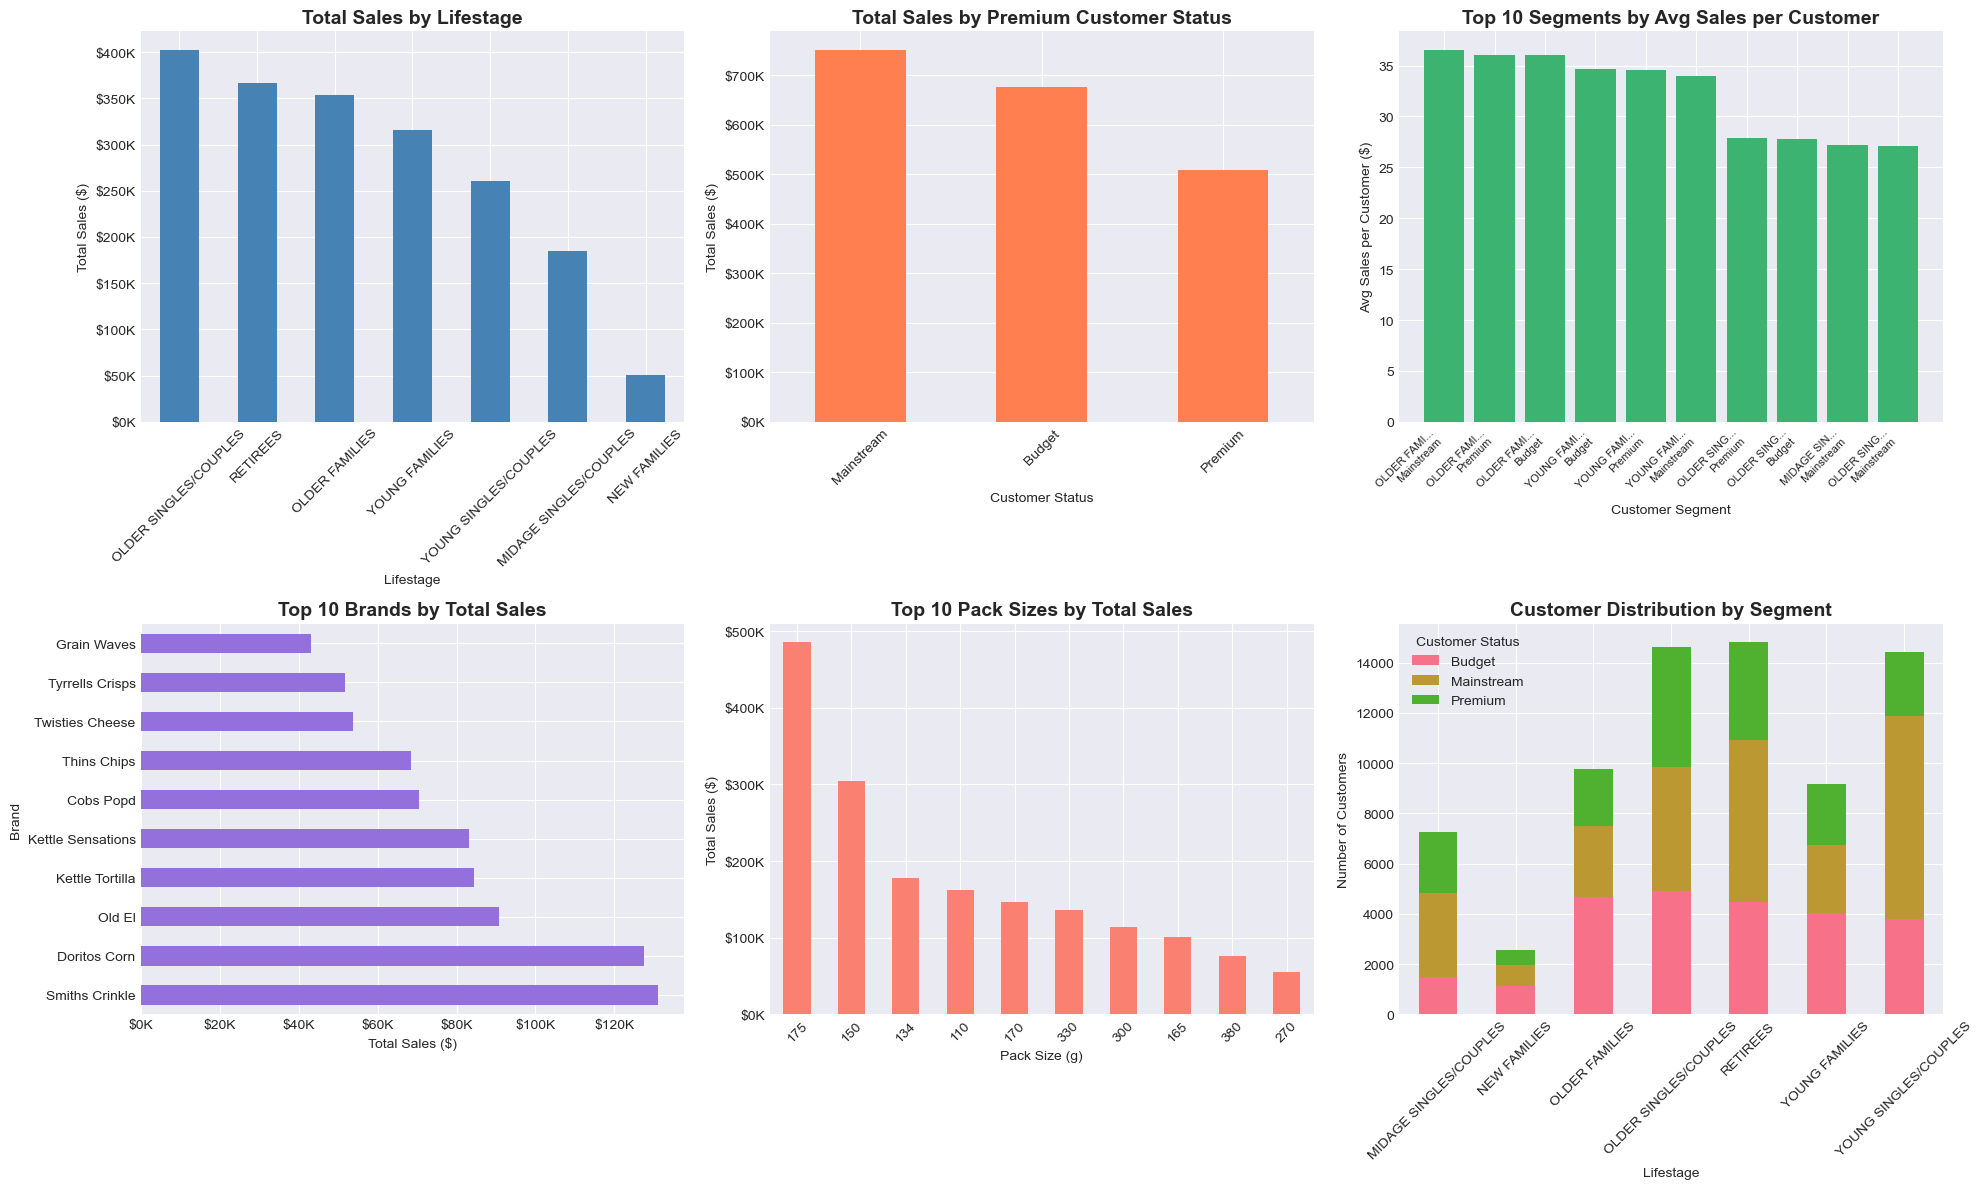

In [21]:
# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Create figure with multiple subplots
fig = plt.figure(figsize=(20, 12))

# 1. Total Sales by Lifestage
ax1 = plt.subplot(2, 3, 1)
lifestage_sales = df.groupby('LIFESTAGE')['TOT_SALES'].sum().sort_values(ascending=False)
lifestage_sales.plot(kind='bar', ax=ax1, color='steelblue')
ax1.set_title('Total Sales by Lifestage', fontsize=14, fontweight='bold')
ax1.set_xlabel('Lifestage')
ax1.set_ylabel('Total Sales ($)')
ax1.tick_params(axis='x', rotation=45)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# 2. Total Sales by Premium Customer Status
ax2 = plt.subplot(2, 3, 2)
premium_sales = df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().sort_values(ascending=False)
premium_sales.plot(kind='bar', ax=ax2, color='coral')
ax2.set_title('Total Sales by Premium Customer Status', fontsize=14, fontweight='bold')
ax2.set_xlabel('Customer Status')
ax2.set_ylabel('Total Sales ($)')
ax2.tick_params(axis='x', rotation=45)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# 3. Average Sales per Customer by Segment
ax3 = plt.subplot(2, 3, 3)
avg_sales_segment = segment_analysis.reset_index().sort_values('Avg_Sales_Per_Customer', ascending=False).head(10)
x_labels = [f"{row['LIFESTAGE'][:10]}...\n{row['PREMIUM_CUSTOMER']}" 
            for _, row in avg_sales_segment.iterrows()]
ax3.bar(range(len(avg_sales_segment)), avg_sales_segment['Avg_Sales_Per_Customer'], color='mediumseagreen')
ax3.set_title('Top 10 Segments by Avg Sales per Customer', fontsize=14, fontweight='bold')
ax3.set_xlabel('Customer Segment')
ax3.set_ylabel('Avg Sales per Customer ($)')
ax3.set_xticks(range(len(avg_sales_segment)))
ax3.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=8)

# 4. Top 10 Brands by Sales
ax4 = plt.subplot(2, 3, 4)
top_brands = df.groupby('BRAND')['TOT_SALES'].sum().sort_values(ascending=False).head(10)
top_brands.plot(kind='barh', ax=ax4, color='mediumpurple')
ax4.set_title('Top 10 Brands by Total Sales', fontsize=14, fontweight='bold')
ax4.set_xlabel('Total Sales ($)')
ax4.set_ylabel('Brand')
ax4.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# 5. Pack Size Distribution
ax5 = plt.subplot(2, 3, 5)
pack_size_dist = df.groupby('PACK_SIZE')['TOT_SALES'].sum().sort_values(ascending=False).head(10)
pack_size_dist.plot(kind='bar', ax=ax5, color='salmon')
ax5.set_title('Top 10 Pack Sizes by Total Sales', fontsize=14, fontweight='bold')
ax5.set_xlabel('Pack Size (g)')
ax5.set_ylabel('Total Sales ($)')
ax5.tick_params(axis='x', rotation=45)
ax5.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# 6. Customer Distribution by Segment
ax6 = plt.subplot(2, 3, 6)
customer_segment = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
customer_segment_pivot = customer_segment.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', 
                                                  values='LYLTY_CARD_NBR')
customer_segment_pivot.plot(kind='bar', stacked=True, ax=ax6)
ax6.set_title('Customer Distribution by Segment', fontsize=14, fontweight='bold')
ax6.set_xlabel('Lifestage')
ax6.set_ylabel('Number of Customers')
ax6.tick_params(axis='x', rotation=45)
ax6.legend(title='Customer Status')

plt.tight_layout()
plt.savefig('chip_analysis_visualizations.png', dpi=300, bbox_inches='tight')
print("✓ Saved visualizations to 'chip_analysis_visualizations.png'")
plt.show()

## 10. Key Insights and Strategic Recommendations

In [22]:
print("="*80)
print("📊 KEY FINDINGS:")
print("="*80)

# Find top performing segment
top_segment = segment_analysis.sort_values('Total_Sales', ascending=False).head(1)
top_segment_index = top_segment.index[0]
print(f"\n1. TOP PERFORMING SEGMENT:")
print(f"   Lifestage: {top_segment_index[0]}")
print(f"   Customer Status: {top_segment_index[1]}")
print(f"   Total Sales: ${top_segment['Total_Sales'].values[0]:,.2f}")
print(f"   Avg Sales per Customer: ${top_segment['Avg_Sales_Per_Customer'].values[0]:,.2f}")

# Find highest spending lifestage
top_lifestage = lifestage_analysis.sort_values('Total_Sales', ascending=False).head(1)
print(f"\n2. HIGHEST SPENDING LIFESTAGE:")
print(f"   {top_lifestage.index[0]}")
print(f"   Total Sales: ${top_lifestage['Total_Sales'].values[0]:,.2f}")
print(f"   Number of Customers: {int(top_lifestage['Customers'].values[0])}")

# Premium vs Budget/Mainstream analysis
print(f"\n3. PREMIUM CUSTOMER CONTRIBUTION:")
premium_row = premium_analysis.loc['Premium'] if 'Premium' in premium_analysis.index else None
if premium_row is not None:
    total_sales_all = premium_analysis['Total_Sales'].sum()
    premium_contribution = (premium_row['Total_Sales'] / total_sales_all) * 100
    print(f"   Premium customers contribute {premium_contribution:.1f}% of total sales")
    print(f"   Avg sales per premium customer: ${premium_row['Avg_Sales_Per_Customer']:,.2f}")

# Top brand
top_brand = df.groupby('BRAND')['TOT_SALES'].sum().sort_values(ascending=False).head(1)
print(f"\n4. TOP PERFORMING BRAND:")
print(f"   {top_brand.index[0]}: ${top_brand.values[0]:,.2f}")

# Most popular pack size
top_pack = df.groupby('PACK_SIZE')['TOT_SALES'].sum().sort_values(ascending=False).head(1)
if len(top_pack) > 0 and pd.notna(top_pack.index[0]):
    print(f"\n5. MOST POPULAR PACK SIZE:")
    print(f"   {int(top_pack.index[0])}g: ${top_pack.values[0]:,.2f}")

📊 KEY FINDINGS:

1. TOP PERFORMING SEGMENT:
   Lifestage: OLDER FAMILIES
   Customer Status: Budget
   Total Sales: $168,363.25
   Avg Sales per Customer: $36.01

2. HIGHEST SPENDING LIFESTAGE:
   OLDER SINGLES/COUPLES
   Total Sales: $402,426.75
   Number of Customers: 14609

3. PREMIUM CUSTOMER CONTRIBUTION:
   Premium customers contribute 26.2% of total sales
   Avg sales per premium customer: $26.82

4. TOP PERFORMING BRAND:
   Smiths Crinkle: $131,142.20

5. MOST POPULAR PACK SIZE:
   175g: $485,437.40


In [23]:
print("\n" + "="*80)
print("💡 STRATEGIC RECOMMENDATIONS:")
print("="*80)

recommendations = [
    "1. FOCUS ON HIGH-VALUE SEGMENTS:",
    "   • Prioritize marketing efforts towards top-performing lifestage segments",
    "   • Develop targeted promotions for premium customers who show highest spending",
    "   • Create loyalty programs to retain high-value customer segments",
    "",
    "2. PRODUCT ASSORTMENT OPTIMIZATION:",
    "   • Ensure adequate stock of popular pack sizes identified in the analysis",
    "   • Expand offerings from top-performing brands",
    "   • Consider introducing premium variants for high-spending segments",
    "",
    "3. CATEGORY MANAGEMENT:",
    "   • Optimize shelf space allocation based on sales performance by segment",
    "   • Place popular brands and pack sizes at eye level for target demographics",
    "   • Consider seasonal adjustments based on family-oriented lifestages",
    "",
    "4. MARKETING STRATEGY:",
    "   • Develop segment-specific marketing campaigns",
    "   • Use insights on brand preferences to guide promotional activities",
    "   • Target acquisition campaigns towards underrepresented high-value segments",
    "",
    "5. PRICING STRATEGY:",
    "   • Review pricing for different pack sizes to optimize revenue",
    "   • Consider bundle offers for families and larger households",
    "   • Implement dynamic pricing for different customer segments"
]

for rec in recommendations:
    print(rec)

print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)


💡 STRATEGIC RECOMMENDATIONS:
1. FOCUS ON HIGH-VALUE SEGMENTS:
   • Prioritize marketing efforts towards top-performing lifestage segments
   • Develop targeted promotions for premium customers who show highest spending
   • Create loyalty programs to retain high-value customer segments

2. PRODUCT ASSORTMENT OPTIMIZATION:
   • Ensure adequate stock of popular pack sizes identified in the analysis
   • Expand offerings from top-performing brands
   • Consider introducing premium variants for high-spending segments

3. CATEGORY MANAGEMENT:
   • Optimize shelf space allocation based on sales performance by segment
   • Place popular brands and pack sizes at eye level for target demographics
   • Consider seasonal adjustments based on family-oriented lifestages

4. MARKETING STRATEGY:
   • Develop segment-specific marketing campaigns
   • Use insights on brand preferences to guide promotional activities
   • Target acquisition campaigns towards underrepresented high-value segments

5. PRI

## 11. Save Processed Data and Summary

In [24]:
# Save processed data
df.to_csv('processed_chip_data.csv', index=False)
print("✓ Saved processed data to 'processed_chip_data.csv'")

# Save summary statistics
with open('analysis_summary.txt', 'w') as f:
    f.write("CHIP PURCHASE BEHAVIOR ANALYSIS - SUMMARY\n")
    f.write("="*80 + "\n\n")
    f.write("SEGMENT ANALYSIS:\n")
    f.write("-"*80 + "\n")
    f.write(segment_analysis.to_string())
    f.write("\n\n")
    f.write("LIFESTAGE ANALYSIS:\n")
    f.write("-"*80 + "\n")
    f.write(lifestage_analysis.to_string())
    f.write("\n\n")
    f.write("PREMIUM CUSTOMER ANALYSIS:\n")
    f.write("-"*80 + "\n")
    f.write(premium_analysis.to_string())

print("✓ Saved summary statistics to 'analysis_summary.txt'")

print("\n📁 Output files created:")
print("   1. chip_analysis_visualizations.png - Visual insights")
print("   2. processed_chip_data.csv - Cleaned and enriched dataset")
print("   3. analysis_summary.txt - Summary statistics")

✓ Saved processed data to 'processed_chip_data.csv'
✓ Saved summary statistics to 'analysis_summary.txt'

📁 Output files created:
   1. chip_analysis_visualizations.png - Visual insights
   2. processed_chip_data.csv - Cleaned and enriched dataset
   3. analysis_summary.txt - Summary statistics
